In [1]:
import numpy as np
import pandas as pd

In [2]:
catboost = pd.read_csv('PostProcess/E-Sun_Credit_Card_Fraud_Detection_submission_catboost_16.csv')
print(len(catboost[catboost['fraud_ind']==1]))

xgboost = pd.read_csv('PostProcess/E-Sun_Credit_Card_Fraud_Detection_xgboost_7.csv')
print(len(xgboost[xgboost['fraud_ind']==1]))

lightgbm_kaggle = pd.read_csv('PostProcess/E-Sun_Credit_Card_Fraud_Detection_submission_lightgbm_vote.csv')
print(len(lightgbm_kaggle[lightgbm_kaggle['fraud_ind']==1]))

lightgbm_jeff = pd.read_csv('PostProcess/E-Sun_Credit_Card_Fraud_Detection_submission_Jeff_672959.csv')
print(len(lightgbm_jeff[lightgbm_jeff['fraud_ind']==1]))

lightgbm_spw = pd.read_csv('PostProcess/E-Sun_Credit_Card_Fraud_Detection_submission_lightgbm_scale_pos_weight_vote.csv')
print(len(lightgbm_spw[lightgbm_spw['fraud_ind']==1]))

lightgbm_dae = pd.read_csv('PostProcess/E-Sun_Credit_Card_Fraud_Detection_submission_V.csv')
print(len(lightgbm_dae[lightgbm_dae['fraud_ind']==1]))

lightgbm_V9 = pd.read_csv('PostProcess/E-Sun_Credit_Card_Fraud_Detection_submission_lightgbm_V9.csv')
print(len(lightgbm_V9[lightgbm_V9['fraud_ind']==1]))

NN = pd.read_csv('PostProcess/E-Sun_Credit_Card_Fraud_Detection_submission_NN2.csv')
NN['fraud_ind'] = (NN.fraud_ind > 0.4).astype(int)
print(len(NN[NN['fraud_ind']==1]))

6575
6192
5941
6358
6171
5058
6108
6144


In [3]:
sub = lightgbm_kaggle.copy()
#sub.fraud_ind = lightgbm_V9.fraud_ind + lightgbm_jeff.fraud_ind + lightgbm_dae.fraud_ind#*0.5 + lightgbm_spw.fraud_ind*0.5
sub.fraud_ind = lightgbm_kaggle.fraud_ind + lightgbm_jeff.fraud_ind  + lightgbm_spw.fraud_ind*.5 + lightgbm_dae.fraud_ind*.5
#sub.fraud_ind = lightgbm_kaggle.fraud_ind + lightgbm_jeff.fraud_ind  + lightgbm_dae.fraud_ind
print(sub['fraud_ind'].value_counts())

print('--------------------------------------------------------------')
sub['fraud_ind'] = np.where(sub['fraud_ind']>=1, 1, 0)
print(sub['fraud_ind'].value_counts())

0.0    414224
3.0      4508
1.0       893
2.5       660
1.5       642
0.5       395
2.0       343
Name: fraud_ind, dtype: int64
--------------------------------------------------------------
0    414619
1      7046
Name: fraud_ind, dtype: int64


In [4]:
df = np.array([sub.fraud_ind, catboost.fraud_ind, xgboost.fraud_ind, NN.fraud_ind])

np.corrcoef(df)

array([[1.        , 0.8211959 , 0.90094738, 0.71369207],
       [0.8211959 , 1.        , 0.82995266, 0.72655034],
       [0.90094738, 0.82995266, 1.        , 0.69792134],
       [0.71369207, 0.72655034, 0.69792134, 1.        ]])

In [5]:
bakup = sub.copy()

In [6]:
sub.fraud_ind = sub.fraud_ind + catboost.fraud_ind*.2 + xgboost.fraud_ind*.3 + NN.fraud_ind*.1

In [7]:
print(sub['fraud_ind'].value_counts())

0.0    412401
1.6      4113
1.5      1129
0.1      1091
1.3       764
0.2       613
1.0       499
0.3       283
1.1       219
1.4       174
1.2       148
0.3       145
0.5        41
0.6        29
0.4        16
Name: fraud_ind, dtype: int64


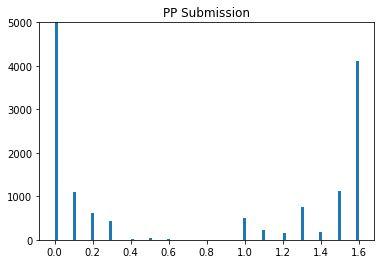

In [8]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(sub['fraud_ind'],bins=100)
plt.ylim((0,5000))
plt.title('PP Submission')
plt.show()

In [9]:
print(len(sub[sub['fraud_ind']>=.55]))
sub['fraud_ind'] = (sub.fraud_ind >= .55).astype(int)

7075


In [11]:
sub.to_csv('E-Sun_Credit_Card_Fraud_Detection_submission_PostProcess.csv')